### Data Generation

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
def makeTerrainData(n_points=1000):
############################################# make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

In [3]:
import numpy as np
import pylab as pl

In [4]:
def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")
    return plt.show

In [5]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [6]:
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

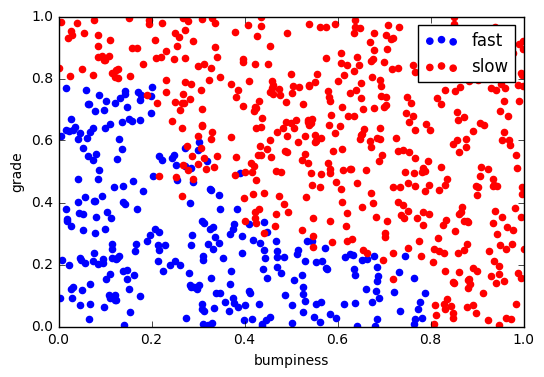

In [7]:
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

### KNN Code

http://scikit-learn.org/stable/modules/neighbors.html

In [8]:
from sklearn.neighbors import NearestNeighbors

In [9]:
import numpy as np

In [10]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(features_train)

In [11]:
distances, indices = nbrs.kneighbors(features_train)

In [12]:
indices

array([[  0, 398],
       [  1, 684],
       [  2, 597],
       ..., 
       [747, 624],
       [748, 685],
       [749, 661]])

In [13]:
distances

array([[ 0.        ,  0.01932471],
       [ 0.        ,  0.02295102],
       [ 0.        ,  0.0110575 ],
       ..., 
       [ 0.        ,  0.01780116],
       [ 0.        ,  0.01975021],
       [ 0.        ,  0.013228  ]])

### KNeighborsClassifier

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)[source]¶

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
neigh = KNeighborsClassifier()

In [16]:
knn = neigh.fit(features_train, labels_train)

In [17]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
pred = neigh.predict(features_test)

<function matplotlib.pyplot.show>

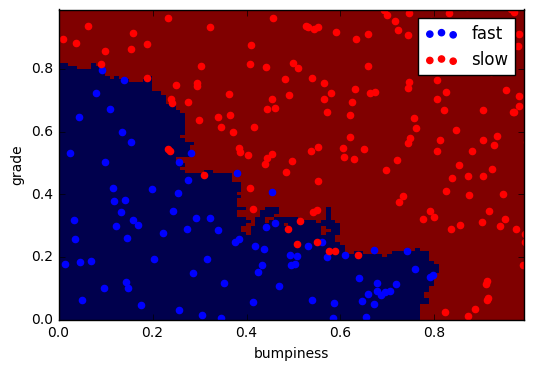

In [19]:
prettyPicture(knn, features_test, labels_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
acc = accuracy_score(pred, labels_test)

In [22]:
round(acc, 3)

0.92

##### Playing around with n_neighbors

n_neigbors=3

In [23]:
neigh3 = KNeighborsClassifier(n_neighbors=3)

In [24]:
knn3 = neigh3.fit(features_train, labels_train)

In [25]:
pred3 = knn3.predict(features_test)

<function matplotlib.pyplot.show>

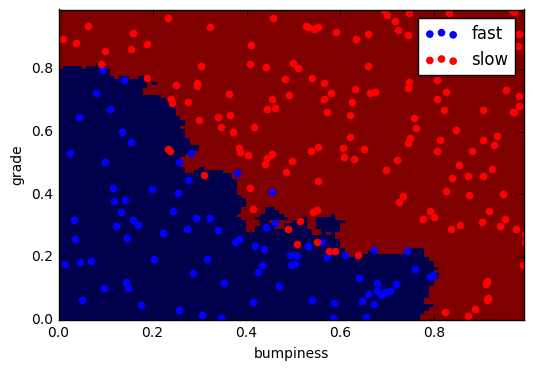

In [26]:
prettyPicture(knn3, features_test, labels_test)

In [27]:
acc3 = accuracy_score(pred3, labels_test)

In [28]:
round(acc3, 3)

0.936

n_neighbors=2

<function matplotlib.pyplot.show>

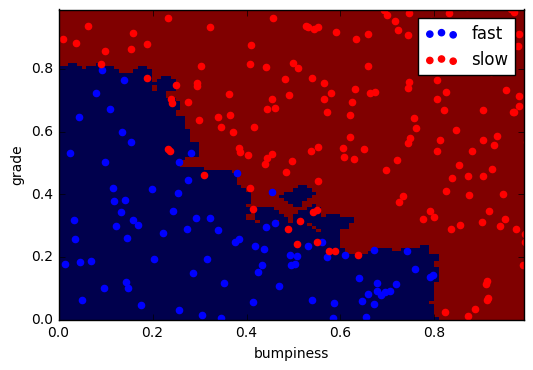

In [29]:
neigh2 = KNeighborsClassifier(n_neighbors=2)
knn2 = neigh2.fit(features_train, labels_train)
pred2 = knn2.predict(features_test)
prettyPicture(knn2, features_test, labels_test)

In [30]:
accuracy_score(pred2, labels_test)

0.92800000000000005

n_neighbors=4

<function matplotlib.pyplot.show>

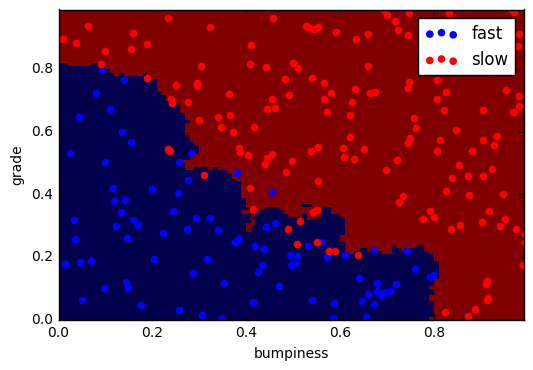

In [31]:
neigh4 = KNeighborsClassifier(n_neighbors=4)
knn4 = neigh4.fit(features_train, labels_train)
pred4 = knn4.predict(features_test)
prettyPicture(knn4, features_test, labels_test)

In [32]:
round(accuracy_score(pred4, labels_test).

0.93999999999999995